Importing **Libraries**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Reading the dataset in **csv format**

In [0]:
data = pd.read_csv("/content/data_task.csv", encoding='ISO-8859-1')


In [50]:
data.head(2)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1


Histogram for target variable "**Result**"

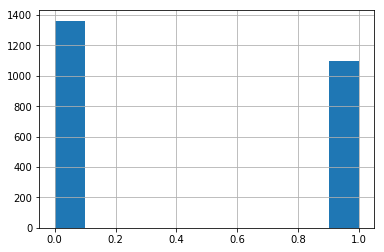

In [51]:
data["Result"].hist()

In [55]:
data.corr()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
having_IP_Address,1.000000,0.103582,0.946315,-0.085825,0.920203,0.108087,0.018615,0.043557,-0.098534,0.030326,...,0.049965,0.028537,0.050481,0.228888,0.106839,-0.016420,-0.047548,0.244556,0.215134,-0.061623
URL_Length,0.103582,1.000000,0.119039,0.069272,0.101536,0.068191,-0.012365,0.041580,-0.326758,0.045295,...,0.053432,0.012847,0.014283,0.051523,0.024704,0.000726,-0.026701,-0.007836,0.084554,-0.055605
Shortining_Service,0.946315,0.119039,1.000000,-0.068114,0.876519,0.111831,0.027941,0.052711,-0.089549,0.014858,...,0.045988,0.018059,0.056724,0.241016,0.095182,-0.027334,-0.043555,0.213561,0.219520,-0.061175
having_At_Symbol,-0.085825,0.069272,-0.068114,1.000000,-0.090966,0.026929,0.001966,-0.004449,-0.001145,-0.116249,...,-0.118706,-0.076476,0.035179,-0.107532,-0.066232,0.038937,-0.029553,-0.088749,-0.102878,0.008336
double_slash_redirecting,0.920203,0.101536,0.876519,-0.090966,1.000000,0.106398,0.020216,0.031330,-0.092049,0.048790,...,0.066721,0.015559,0.037953,0.233517,0.112327,-0.015349,-0.046161,0.202975,0.207816,-0.042536
Prefix_Suffix,0.108087,0.068191,0.111831,0.026929,0.106398,1.000000,0.115494,0.372453,-0.139030,-0.020312,...,-0.010835,0.011677,0.178187,-0.070127,0.241684,0.219008,-0.164327,0.069498,0.012800,-0.537020
having_Sub_Domain,0.018615,-0.012365,0.027941,0.001966,0.020216,0.115494,1.000000,0.259734,-0.049267,-0.017455,...,0.007021,-0.031687,0.338584,-0.061389,0.080901,0.097460,-0.051731,-0.022250,-0.018942,-0.266514
SSLfinal_State,0.043557,0.041580,0.052711,-0.004449,0.031330,0.372453,0.259734,1.000000,-0.219062,0.005514,...,0.003094,-0.002762,0.365856,-0.137868,0.408251,0.277823,-0.137412,-0.012810,-0.023872,-0.712876
Domain_registeration_length,-0.098534,-0.326758,-0.089549,-0.001145,-0.092049,-0.139030,-0.049267,-0.219062,1.000000,-0.065988,...,-0.070668,-0.021585,-0.126950,0.033052,-0.201828,-0.039803,0.071476,0.105951,-0.026921,0.260157
Favicon,0.030326,0.045295,0.014858,-0.116249,0.048790,-0.020312,-0.017455,0.005514,-0.065988,1.000000,...,0.942697,0.643493,0.008309,0.164356,0.079784,-0.032929,-0.024208,0.130500,0.656712,0.005067


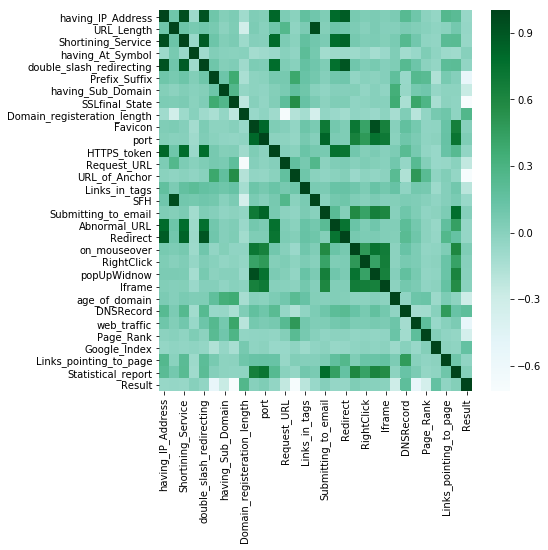

In [52]:
import seaborn as sns
plt.figure(figsize=(7,7)) 
sns.heatmap(data.corr(), cmap='BuGn')


In [0]:
Y=data.Result
df=pd.DataFrame(data)
del df["Result"]

In [31]:
df.head(1)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,0,-1,1,-1,-1,0,1,1


Splitting the data for train and test . **80% - Train and 20% - Test**

In [32]:
#Train test split
from sklearn.model_selection import train_test_split
Xtrain, Xval, ytrain, yval = train_test_split(df, Y, test_size=0.2)
Xtrain.shape, ytrain.shape, Xval.shape, yval.shape

((1964, 30), (1964,), (492, 30), (492,))

Fitting the Decision tree model

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [34]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(Xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [35]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(Xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

Prediction

In [36]:
y_pred = clf_gini.predict(Xval)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,

Accuracy of the model

In [37]:
prediction = clf_entropy.predict(Xtrain)
prediction_val =clf_entropy.predict(Xval)
np.sum(prediction==ytrain)/len(ytrain), np.sum(prediction_val==yval)/len(yval)

(0.9139511201629328, 0.8800813008130082)

Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix 
confusion_matrix( ytrain, prediction)

array([[982, 103],
       [ 66, 813]])

Fitting Logistic Regression Model

In [39]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(C=0.1, dual=True)
model_lr.fit(Xtrain, ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
model_lr.predict(Xval)

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,

In [41]:
prediction = model_lr.predict(Xtrain)
prediction_val =model_lr.predict(Xval)
np.sum(prediction==ytrain)/len(ytrain), np.sum(prediction_val==yval)/len(yval)

(0.9445010183299389, 0.9491869918699187)

In [42]:
from sklearn.metrics import confusion_matrix 
confusion_matrix( ytrain, prediction)

array([[1030,   55],
       [  54,  825]])

Fitting the Naivebayes model

In [43]:
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB()
model_NB.fit(Xtrain,ytrain)


GaussianNB(priors=None, var_smoothing=1e-09)

In [44]:
model_NB.predict(Xval)


array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,

In [45]:
prediction = model_NB.predict(Xtrain)
prediction_val =model_NB.predict(Xval)
np.sum(prediction==ytrain)/len(ytrain), np.sum(prediction_val==yval)/len(yval)

(0.9210794297352343, 0.9247967479674797)

In [46]:
from sklearn.metrics import confusion_matrix 
confusion_matrix( ytrain, prediction)

array([[999,  86],
       [ 69, 810]])